In [1]:
import graphviz as gv

## `Depcode` diagram

#### `write_depcode_input`

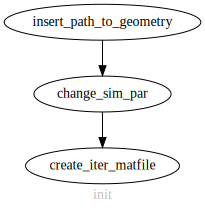

In [2]:
wdi_init = gv.Digraph('cluster_wdi_init')
wdi_init.attr(compound='true',label='init',color='grey',fontcolor='grey')
wdi_init.edge('insert_path_to_geometry','change_sim_par')
wdi_init.edge('change_sim_par', 'create_iter_matfile')
wdi_init

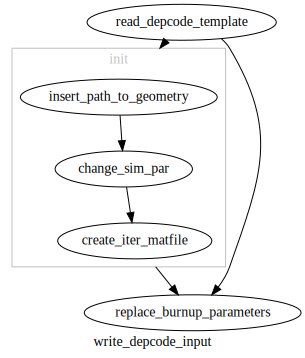

In [3]:
wdi = gv.Digraph('cluster_wdi')
wdi.attr(compound='true',label='write_depcode_input',color='red')
wdi.subgraph(graph=wdi_init)
wdi.edge('read_depcode_template', 'insert_path_to_geometry',lhead='cluster_wdi_init')
wdi.edge('create_iter_matfile','replace_burnup_parameters',ltail='cluster_wdi_init')
wdi.edge('read_depcode_template','replace_burnup_parameters')

wdi

In [4]:
# Depcode Class diagram
depcode = gv.Digraph('cluster_depcode', node_attr = {'color' : 'red'})
depcode.attr(compound='true',label='Depcode')

depcode.subgraph(graph=wdi)

depcode.node('get_nuc_name')
depcode.node('get_tra_or_dec')
depcode.node('read_dep_comp')
depcode.node('read_depcode_info')
depcode.node('read_depcode_step_param')
depcode.node('run_depcode')
depcode.node('sss_meta_zzz')
depcode.node('write_mat_file')
depcode.node('write_depcode_input')

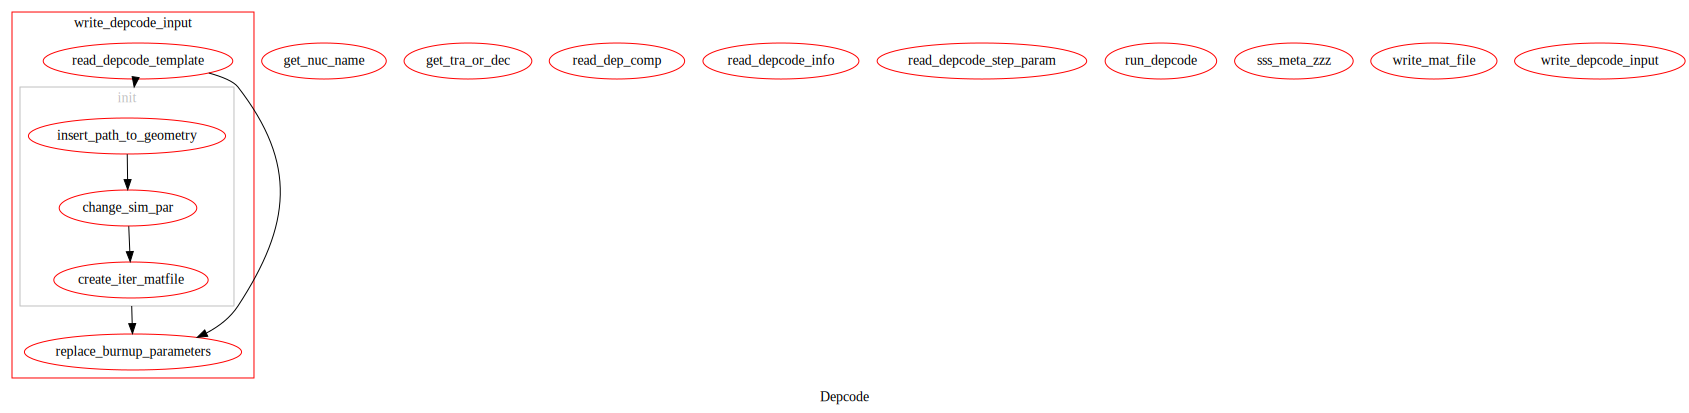

In [5]:
depcode

## `Simulation` diagram

#### `runsim_no_reproc`

In [6]:
rnr_init = gv.Digraph('cluster_rnr_init')
rnr_init.attr(compound='true', label='init', color='grey',fontcolor='grey')
rnr_init.node('write_depcode_input',color='red')
rnr_init.node('store_run_init_info')

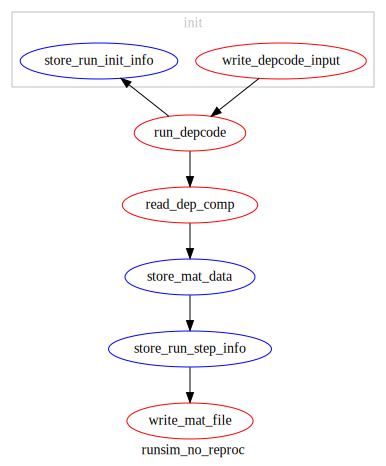

In [7]:
rnr = gv.Digraph('cluster_rnr',node_attr = {'color' : 'blue'})
rnr.attr(compound='true', label='runsim_no_reproc',color='blue')
rnr.subgraph(graph=rnr_init)
rnr.node('store_mat_data')
rnr.node('store_run_step_info')

rnr.attr('node',name='depcode_nodes',color='red')
rnr.edge('write_depcode_input','run_depcode')#rnr.edge('replace_burnup_parameters', 'run_depcode', ltail='cluster_wdi')
rnr.edge('run_depcode','store_run_init_info')
rnr.edge('run_depcode','read_dep_comp')
rnr.edge('read_dep_comp','store_mat_data')
rnr.edge('store_mat_data','store_run_step_info')
rnr.edge('store_run_step_info','write_mat_file')
rnr
#print(rnr)

#### `store_after_reproc`

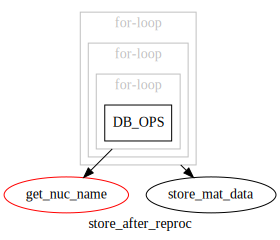

In [8]:
sar_loop = gv.Digraph('cluster_sar_loop')
sar_loop.attr(compound='true',label='for-loop',color='grey',fontcolor='grey')
with sar_loop.subgraph(name='cluster_sar_loop0') as l0:
    l0.attr(compound='true',label='for-loop')
    with l0.subgraph(name='cluster_sar_loop1') as l1:
        l1.attr(compound='true',label='for-loop')
        l1.node('sar_db_op',label='DB_OPS',shape='box',color='black')
        
sar = gv.Digraph('cluster_sar')
sar.attr(compound='true', label='store_after_reproc', color='blue')
sar.subgraph(graph=sar_loop)
sar.node('get_nuc_name',color='red')
sar.edge('sar_db_op', 'get_nuc_name', ltail='cluster_sar_loop1')
sar.edge('sar_db_op','store_mat_data',ltail='cluster_sar_loop')

sar

#### `store_mat_data`

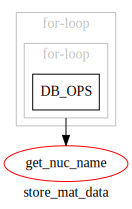

In [9]:
smd_loop = gv.Digraph('cluster_smd_loop')
smd_loop.attr(compound='true',label='for-loop',color='grey',fontcolor='grey')
with smd_loop.subgraph(name='cluster_smd_loop0') as l0:
    l0.attr(compound='true',label='for-loop')
    l0.node('smd_db_op',label='DB_OPS',shape='box',color='black')
        
smd = gv.Digraph('cluster_smd')
smd.attr(compound='true',label='store_mat_data',color='blue')
smd.node('get_nuc_name',color='red')
smd.subgraph(graph=smd_loop)
smd.edge('smd_db_op','get_nuc_name',ltail='cluster_smd_loop0')
smd


#### `store_run_step_info`

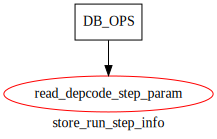

In [10]:
srsi = gv.Digraph('cluster_srsi')
srsi.attr(compound='true',label='store_run_step_info',color='blue')
srsi.node('srsi_db_op',label='DB_OPS',color='black',shape='box')
srsi.node('read_depcode_step_param',color='red')
srsi.edge('srsi_db_op','read_depcode_step_param',ltail='cluster_srsi')
srsi

#### `store_run_init_info`

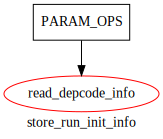

In [11]:
srii = gv.Digraph('cluster_srii')
srii.attr(compound='true',label='store_run_init_info',color='blue')
srii.node('srii_param_op',label='PARAM_OPS',color='black',shape='box')
srii.node('read_depcode_info',color='red')
srii.edge('srii_param_op','read_depcode_info',ltail='cluster_srii')
srii

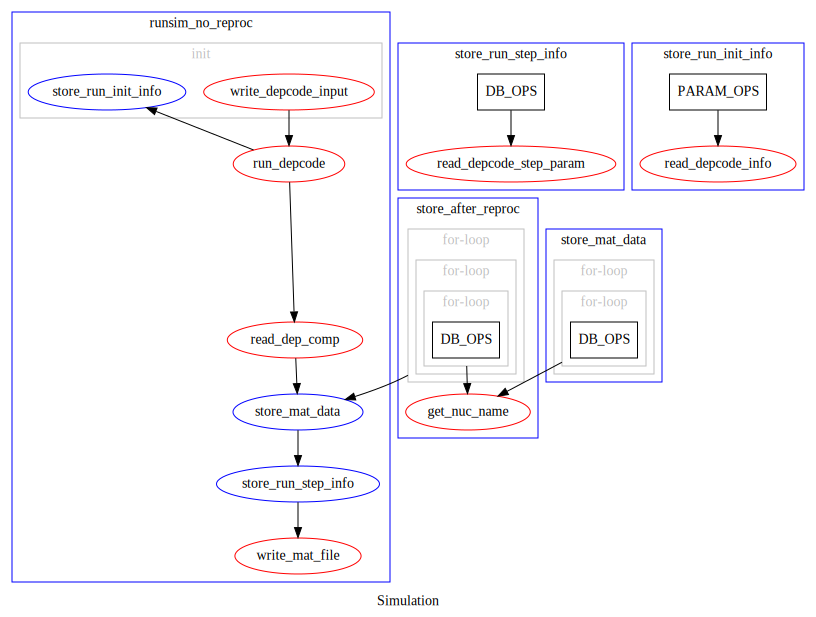

In [21]:
simulation = gv.Digraph('cluster_simulation', node_attr = {'color' : 'blue'})
simulation.attr(compound='true',label='Simulation')
simulation.subgraph(graph=rnr)
simulation.subgraph(graph=sar)
simulation.subgraph(graph=smd)
simulation.subgraph(graph=srsi)
simulation.subgraph(graph=srii)
simulation

In [ ]:
saltproc = gv.Digraph('saltproc')
saltproc.attr(compound='true', label='SaltProc')
saltproc.subgraph(graph=depcode)
saltproc.subgraph(graph=simulation)

In [ ]:
saltproc

In [ ]:
test = gv.Digraph('test')
test.subgraph(graph=sar)

In [ ]:
test